In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import sys
import collections
import math
import pickle
import re
import bisect

# mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 18})
np.set_printoptions(threshold=np.inf)


def store(x, path):
    with open(path, 'wb') as f:
        pickle.dump(x, f)

def load(x, path):
    with open(path, 'rb') as f:
        x = pickle.load(f)

def avg(x):
    return sum(x) / float(len(x))

def variance(x):
    n = len(x)
    mean = sum(x) / float(n)
    ss = sum([(i-mean)**2 for i in x]) / float(n)
    ss = math.sqrt(ss)
    return ss

def cdf(arr):
    x = sorted(arr)
    y = [i for i in range(1, len(x) + 1)]
    for i in range(len(y)):
        y[i] /= float(y[-1])
    return x, y




avg(janks_android) 8.154335714285713
avg(janks_marvin) 10.605814285714287
avg(janks_our) 8.303630521428571
avg(fps_android) 45.58645714285715
avg(fps_marvin) 39.63386785714285
avg(fps_our) 45.60769154571428


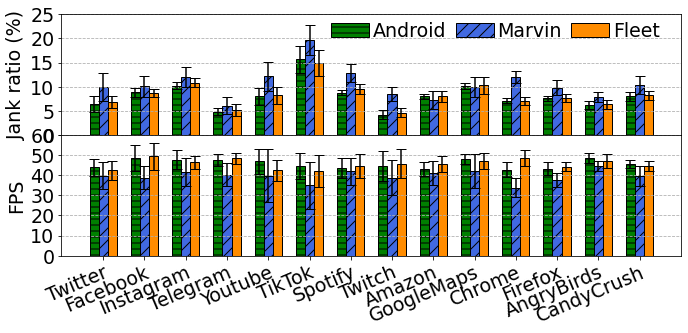

In [346]:
# Plot the FPS and Junk Figure

plt.rcParams.update({'font.size': 19})

labels = ['Twitter', 'Facebook', 'Instagram', 'Telegram', 'Youtube', \
          'TikTok', 'Spotify', 'Twitch', 'Amazon', 'GoogleMaps', \
          'Chrome', 'Firefox', 'AngryBirds', 'CandyCrush']




fps_android = [43.880, 48.5056, 47.727, 47.4687, 46.8977, \
               44.4398, 43.63, 44.5763, 42.944, 48.0849, \
               42.671, 43.2464, 48.5862, 45.5528]
fps_android_dev = [4.369, 6.277847058, 4.724, 3.052, 6.215, \
                   6.572, 4.849, 7.405, 3.4473, 2.5322, \
                   3.729, 3.084, 2.623, 2.105]

fps_marvin = [39.73, 38.838, 41.64, 40.35, 39.72, \
              35.05, 41.95, 38.713, 40.92715, 42.235, \
              33.884, 37.65, 44.463, 39.724]
fps_marvin_dev = [6.758, 5.925, 7.024, 5.788, 13.235, \
                  11.736, 6.8235, 8.702, 5.96237014, 8.35, \
                  4.573, 3.542, 2.524, 4.849]

fps_our = [42.374, 49.32696164, 46.436, 48.353, 42.485, \
           42.245, 44.54, 45.77, 45.46472, 46.905, \
           48.394, 44.236, 47.226, 44.752]
fps_our_dev = [4.665, 6.554935691, 3.358, 2.830, 5.173, \
               7.951, 5.949, 7.182, 3.975592297, 3.962, \
               4.022, 2.350, 3.4982, 2.438]


X = np.arange(len(labels))  # the label locations
width = 0.22  # the width of the bars
# fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8), sharex=True, hspace=0)

fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(2,  hspace=0)
(ax1, ax2) = gs.subplots( sharex=True)


print("avg(janks_android)", avg(janks_android))
print("avg(janks_marvin)", avg(janks_marvin))
print("avg(janks_our)", avg(janks_our))


rects11 = ax1.bar(X - 1 * width, janks_android, width, yerr=janks_android_dev, capsize=5, color='green', hatch='--', edgecolor='black', label='Android')
rects12 = ax1.bar(X - 0 * width, janks_marvin, width, yerr=janks_marvin_dev, capsize=5, color='royalblue', hatch='//', edgecolor='black', label='Marvin')
rects13 = ax1.bar(X + 1 * width, janks_our, width, yerr=janks_our_dev, capsize=5, color='darkorange', edgecolor='black', label='Fleet')


print("avg(fps_android)", avg(fps_android))
print("avg(fps_marvin)", avg(fps_marvin))
print("avg(fps_our)", avg(fps_our))

rects21 = ax2.bar(X - 1 * width, fps_android, width, yerr=fps_android_dev, capsize=5, color='green', hatch='--', edgecolor='black', label='Android')
rects22 = ax2.bar(X - 0 * width, fps_marvin, width, yerr=fps_marvin_dev, capsize=5, color='royalblue', hatch='//', edgecolor='black', label='Marvin')
rects23 = ax2.bar(X + 1 * width, fps_our, width, yerr=fps_our_dev, capsize=5, color='darkorange', edgecolor='black', label='Fleet')



ax1.set_ylabel('Jank ratio (%)')
ax1.set_xticks(X)
ax1.set_yticks(range(0, 26, 5))
# ax.set_ylim((0, 25000))
ax1.set_xticklabels(labels,  rotation=90)
ax1.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.7, 1.08), ncol=3, handletextpad=0.2, columnspacing=0.5)
# ax1.legend(frameon=False)
ax1.grid(linestyle='--', axis='y' )


ax2.set_ylabel('FPS')
ax2.set_xticks(X)
ax2.set_yticks(range(0, 65, 10))
# ax.set_ylim((0, 25000))
ax2.set_xticklabels(labels, rotation=23, ha='right', rotation_mode='anchor')
# ax2.legend()
ax2.grid(linestyle='--', axis='y' )


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height+2),
                    xytext=(0, 4),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

# ax.legend(frameon=False, loc='upper center',bbox_to_anchor=(0.52, 1.03),ncol=3, handletextpad=0.2, columnspacing=0.5, bbox_transform=plt.gcf().transFigure)
# ax.legend(frameon=False, loc='upper center',bbox_to_anchor=(0.5, 0.99),ncol=3, bbox_transform=plt.gcf().transFigure)



# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()
fig.savefig('figure-runtime-performance.eps', bbox_inches = 'tight')
